### **1. Synthetic Data Generation (SDG)**

#### **What it is:**
The process of creating artificial data that mimics real-world datasets while preserving their statistical properties. It is often used when access to real data is restricted due to privacy concerns or when augmenting existing datasets for machine learning tasks.

#### **Applications:**
- Data privacy and security (avoiding exposure of sensitive data).
- Augmenting datasets for machine learning model training.
- Testing software systems with realistic, but non-sensitive data.
- Data sharing in research while preserving confidentiality.

#### **Advantages:**
- Solves data scarcity issues.
- Maintains privacy and confidentiality of sensitive data.
- Enables robust testing and development of models and systems.

#### **Disadvantages:**
- Risk of producing unrealistic data if not configured properly.
- Computational overhead for certain techniques.
- Requires domain expertise to ensure synthetic data validity.

---

### **2. Tabular Synthetic Data Generation**

#### **What it is:**
A subcategory of SDG focusing on generating synthetic data for tabular datasets, which are structured with rows and columns, like spreadsheets or relational database tables.

#### **Applications:**
- Mimicking business or medical datasets for research.
- Generating data for structured models in machine learning.
- Creating synthetic relational database tables.

#### **Techniques (Broad Overview):**
- **Generative Adversarial Networks (GANs):** For complex data with non-linear relationships.
- **Copula-Based Models:** For simpler, linear data distributions.
- **Relational Modeling:** For datasets with multiple interrelated tables.
- **Sequential Modeling:** For time-series or event-based datasets.

#### **Advantages:**
- Flexible in handling structured data formats.
- Maintains statistical properties and feature relationships.
- Can be adapted to various use cases, including privacy-sensitive applications.

#### **Disadvantages:**
- Choice of technique affects quality; no one-size-fits-all model.
- Requires preprocessing and configuration to fit use cases.

---

### **3. Techniques for Tabular SDG (Subcategories)**

#### **3.1. GAN-Based Techniques (e.g., CTGAN)**
- **What it is:** A generative adversarial network designed for tabular data.
- **Application:** Suitable for datasets with mixed data types and complex relationships.
- **Advantages:** Captures non-linear dependencies effectively.
- **Disadvantages:** Computationally intensive and requires careful hyperparameter tuning.

---

#### **3.2. Copula-Based Techniques (e.g., Gaussian Copula)**
- **What it is:** A statistical model that uses copulas to generate synthetic data.
- **Application:** Ideal for datasets with linear or Gaussian relationships.
- **Advantages:** Simple, lightweight, and effective for structured data.
- **Disadvantages:** Limited for datasets with complex or non-linear dependencies.

---

#### **3.3. Relational Modeling (e.g., HMA)**
- **What it is:** A hierarchical approach to model datasets with multiple related tables.
- **Application:** Perfect for relational databases (e.g., e-commerce datasets with user, order, and product tables).
- **Advantages:** Preserves relationships across tables.
- **Disadvantages:** Complex to set up and computationally heavy for large databases.

---

#### **3.4. Sequential Modeling (e.g., PAR)**
- **What it is:** A probabilistic autoregressive model for generating sequential data.
- **Application:** Best for time-series data or datasets with temporal dependencies.
- **Advantages:** Captures sequential patterns effectively.
- **Disadvantages:** Limited to time-series data and requires domain-specific knowledge.

---

In [62]:
# %pip install sdv

In [63]:
import pandas as pd
from sdv.datasets.demo import download_demo
from sdv.datasets.local import load_csvs
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot


from sdv.single_table import GaussianCopulaSynthesizer
from sdv.multi_table import HMASynthesizer
from sdv.sequential import PARSynthesizer


In [64]:
dataset_folder_name = r"D:\Learnings\Practices_Projects\Learning_Notes\Datasets\power_data"

try:
  data = load_csvs(folder_name=dataset_folder_name)
  # data = pd.read_csv(dataset_file_path)
  print("Data Shape: ", data.keys())
except ValueError:
  print('You have not uploaded any csv files. Using some demo data instead.')
  data, _ = download_demo(
    modality='multi_table',
    dataset_name='fake_hotels'
  )

Data Shape:  dict_keys(['global_power_plant_database_s1'])


## Remove the Outliers

# 2. Writing a Metadata Description
The SDV requires that you provide a description of your data, also known as **metadata**.

The metadata describes the types of data that are available in every column. If you have multiple tables, it also describes how those tables are connected.

## 2.1 Auto Detecting Metadata
The easiest way to create our metadata object is by auto-detecting it from our data.

<font color="maroon"><b>Warning: The detected metadata is not guaranteed to be accurate or complete.</b> We'll update it later to correct it.</font>

In [65]:
data.keys()

dict_keys(['global_power_plant_database_s1'])

In [66]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframes(data)

Auto detected data:



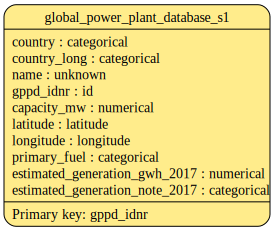

In [67]:
print('Auto detected data:\n')
metadata.visualize()

The metadata auto-detected the connection between the `hotels` and `guests` table. Each column is associated with an **sdtype**, which describes the type of data.

Notice that the sdtypes vary:
- Statistical sdtypes such as `categorical`, `datetime` and `numerical` provide more general information about the type of data
- Semantic sdtypes such as `credit_card_number` and `city` provide higher level information that is understandable to humans

For more information, see the [sdtypes docs page](https://docs.sdv.dev/sdv/reference/metadata-spec/sdtypes).

<font color="red"><b>The auto-detected metadata is not guaranteed to be accurate or complete.</b></font> For example, notice how some of the columns are shown as `unknown` sdtype. Let's fix these columns to make it more accurate.

## 2.2 Fixing sdtypes

In [68]:


# # **Hotels table**: Let's start with the hotels.

# # The `classification` column is meant to be a discrete variable, so we can update it to be categorical.

# metadata.update_column(
#     table_name='hotels',
#     column_name='classification',
#     sdtype='categorical'
# )

# # Notice that `city` and `state` are marked with special sdtypes `city` and `administrative_unit`. 
# # SDV's sdtypes include higher-level concepts like this for better modeling.

# # By default, these higher level concepts are considered **PII**, meaning that SDV will anonymize these columns. 
# # You can turn this off by marking PII as False.

# metadata.update_column(
#     table_name='hotels',
#     column_name='state',
#     sdtype='administrative_unit',
#     pii=False
# )

# # **Guests table**: Now we can move onto the guests table.
# # The `billing_address` is currently marked as unknown. This is a PII value. Let's update this in the metadata too.

# metadata.update_column(
#     table_name='guests',
#     column_name='billing_address',
#     sdtype='address',
#     pii=True
# )



## 2.3 Metadata Validation and Save
Now, the metadata should be accurate. Let's validate that the metadata format makes sense. If successful, the code below should run without any errors.

We **highly recommend saving the metadata** as a `JSON` object so we can re-use this description whenever we need to.

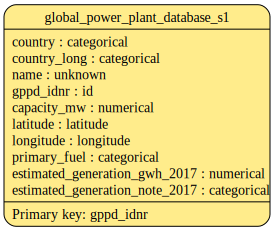

In [69]:
metadata.validate()
metadata.validate_data(data=data)
metadata.visualize()

In [71]:
# metadata.save_to_json('metadata.json')

# # in the future, you can reload the metadata object from the file
# metadata = Metadata.load_from_json('metadata.json')

In [72]:
def data_loader(data, metadata):
    read_data = data['global_power_plant_database_s1']
    metadata = metadata
    print("Read Data Shape: ", read_data.shape)
    return read_data, metadata

# def data_loader():
#     # Demo Datasets loader
#     real_data, metadata = download_demo(
#         modality='single_table',
#         dataset_name='fake_hotel_guests'
#     )

#     print("Shape: ", real_data.shape)
#     print("Metadate: ", metadata.visualize())

#     return real_data, metadata


In [90]:
## 2.1 Creating a Synthesizer:
# An SDV **synthesizer** is an object that you can use to create synthetic data. 
# It learns patterns from the real data and replicates them to generate synthetic data.

## 2.2 Generating Synthetic Data
# Use the `sample` function and pass in any number of rows to synthesize.

def creating_the_synthesizer(real_data, metadata, sdv_algorithm = "CTGAN", context_columns=['Sector', 'Industry']):
    if sdv_algorithm == "CTGAN":
        print("Applied Algorithm: ", sdv_algorithm)
        custom_synthesizer = CTGANSynthesizer(
            metadata,
            # epochs=1000,
            # verbose=True
            )
    
    elif sdv_algorithm == "GaussianCopula":
        print("Applied Algorithm: ", sdv_algorithm)
        custom_synthesizer = GaussianCopulaSynthesizer(
            metadata,
            epochs=1000,
            verbose=True
        )

    elif sdv_algorithm == "HMAS":
        print("Applied Algorithm: ", sdv_algorithm)        
        custom_synthesizer = HMASynthesizer(
            metadata,
            # epochs=1000,
            # verbose=True
        )

    elif sdv_algorithm == "PARS":
        print("Applied Algorithm: ", sdv_algorithm)        
        custom_synthesizer = PARSynthesizer(
            metadata,
            # epochs=1000,
            context_columns=context_columns,
            verbose=True
        )
    custom_synthesizer.fit(real_data)

    return custom_synthesizer
    
    

In [82]:
## 2.2 Generating Synthetic Data
# Use the `sample` function and pass in any number of rows to synthesize.

def synthetic_data_generation(synthesizer, number_of_rows_required=1000):
    
    synthetic_data = synthesizer.sample(num_rows=number_of_rows_required)
    print("Synthetic Data Shape: ", synthetic_data.shape)

    return synthetic_data

In [83]:
## 2.3 Evaluating Real vs. Synthetic Data

# SDV has built-in functions for evaluating the synthetic data and getting more insight.

# As a first step, we can run a **diagnostic** to ensure that the data is valid. SDV's diagnostic performs some basic checks such as:

# - All primary keys must be unique
# - Continuous values must adhere to the min/max of the real data
# - Discrete columns (non-PII) must have the same categories as the real data
# - Etc.

# We can also measure the **data quality** or the statistical similarity between the real and synthetic data. 
# This value may vary anywhere from 0 to 100%.

def data_diagnostics_and_quility_report(real_data, metadata, synthetic_data):
    # we can run a **diagnostic** to ensure that the data is valid. SDV's diagnostic performs some basic checks such as:
    diagnostic = run_diagnostic(
        real_data=real_data,
        synthetic_data=synthetic_data,
        metadata=metadata
    )

    print("Diagnostics: ", diagnostic)

    # We can also measure the **data quality** or the statistical similarity between the real and synthetic data. 
    quality_report = evaluate_quality(
        real_data,
        synthetic_data,
        metadata
    )

    print(quality_report)
    # print(quality_report.get_details('Column Shapes'))
    

In [ ]:
# Choose the algorithm: ["CTGAN", "GaussianCopula", "HMAS", "PARS"]

real_data, metadata = data_loader(data, metadata)

custom_synthesizer = creating_the_synthesizer(
    real_data, metadata, 
    sdv_algorithm="GaussianCopula", 
    context_columns = ['name', 'gppd_idnr', 'capacity_mw']
    )
synthetic_data = synthetic_data_generation(custom_synthesizer, number_of_rows_required=100000)

data_diagnostics_and_quility_report(real_data, metadata, synthetic_data)


In [89]:
synthetic_data.head()

country              country_long           name      gppd_idnr  \
0     USA  United States of America  sdv-pii-b6pcm  sdv-id-SvBBaw   
1     RUS            Czech Republic  sdv-pii-m4lxm  sdv-id-ripuCT   
2     GBR  United States of America  sdv-pii-y17mx  sdv-id-wkPhaw   
3     ESP                    Mexico  sdv-pii-4msrg  sdv-id-IbxoNa   
4     USA  United States of America  sdv-pii-r9m5c  sdv-id-DIUTQH   

   capacity_mw   latitude   longitude primary_fuel  \
0    93.684948 -39.926275  154.245765        Solar   
1   112.396190   8.613096 -104.556872          Oil   
2    28.058471  65.802853   29.240304         Wind   
3     3.616749  21.957225    0.313169         Coal   
4    19.447159 -25.048974  131.646040         Coal   

   estimated_generation_gwh_2017 estimated_generation_note_2017  
0                         404.57             CAPACITY-FACTOR-V1  
1                         453.60             CAPACITY-FACTOR-V1  
2                          35.00             CAPACITY-FACTOR-V1  
3                          72.51             CAPACITY-FACTOR-V1  
4                         156.43                       SOLAR-V1

In [ ]:
# !pip install openpyxl

In [49]:
# synthetic_data.to_excel(r"D:\Learnings\Practices_Projects\Learning_Notes\Datasets\Generated_Data\Synthetic_Global_Power_Plant_Data.xlsx", index=False)

In [50]:
synthetic_data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2017'],
      dtype='object')

In [51]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='capacity_mw',
    metadata=metadata
)

fig.show()

In [52]:
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['capacity_mw', 'primary_fuel'],
    metadata=metadata
)

fig.show()


In [42]:
## 2.4 Visualizing the Data
# For more insights, we can visualize the real vs. synthetic data.

# Let's perform a 1D visualization comparing a column of the real data to the synthetic data.
#  We can also visualize in 2D, comparing the correlations of a pair of columns.


def visualizing_dataplots(real_data, metadata, synthetic_data):
    # Let's perform a 1D visualization comparing a column of the real data to the synthetic data.
    fig = get_column_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_name='room_type',
        metadata=metadata
    )

    fig.show()

    #  We can also visualize in 2D, comparing the correlations of a pair of columns.
    fig = get_column_pair_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_names=['room_rate', 'room_type'],
        metadata=metadata
    )

    fig.show()


In [ ]:
visualizing_dataplots(real_data, metadata, synthetic_data)